In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
def plot_side_by_side(data1, data2, title1='W_s1', title2='W_s2', xlabel='time step', ylabel='y1'):
    """
    Plots two figures side by side.

    Parameters:
    data1: Array containing x1 and y1 data for the first plot (data1 = [x1, y1])
    data2: Array containing x2 and y2 data for the second plot (data2 = [x2, y2])
    title1: Title for the first plot (default 'Plot 1')
    title2: Title for the second plot (default 'Plot 2')
    xlabel1: Label for the x-axis of the first plot (default 'x1')
    ylabel1: Label for the y-axis of the first plot (default 'y1')
    xlabel2: Label for the x-axis of the second plot (default 'x2')
    ylabel2: Label for the y-axis of the second plot (default 'y2')
    """
        # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    
    # Plot on the first subplot
    ax1.plot(data1, label=title1)
    ax1.set_title(title1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    # ax1.legend()
    
    # Plot on the second subplot
    ax2.plot(data2, label=title2)
    ax2.set_title(title2)
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel)
    # ax2.legend()
    # ax1.set_ylim(-5, 105)  # Set y-axis limits to range from -2 to 2
    # ax2.set_ylim(-5, 105)  # Set y-axis limits to range from -2 to 2

    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage
data_t1 = np.random.random((10, 2))
data_t2 = np.random.random((10, 2))

In [127]:
w1 = np.load('w1.npy')
w2 = np.load('w2.npy')
w1.shape

(500, 4, 2, 20)

In [152]:
arch = [2, 20, 10, 8]
num_param = sum([arch[i]*arch[i+1] for i in range(len(arch)-1)])*5
param = np.load('param.npy')
param = param[:, :num_param]
param_per_w = num_param//5
A  = param[:, :param_per_w]
B  = param[:, param_per_w:2*param_per_w]
C  = param[:, 2*param_per_w:3*param_per_w]
D  = param[:, 3*param_per_w:4*param_per_w]
lr = param[:, 5*param_per_w:5*param_per_w]

Neuron:  0
1.1650457977190407
Neuron:  1
0.9516441201165209


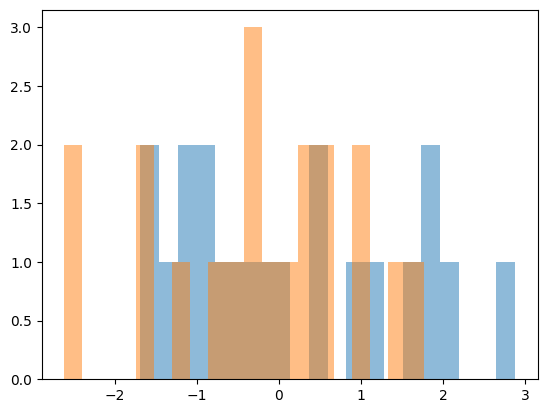

In [174]:
data = A[:, :40]
data = data.reshape(-1, 2, 20) # data shape: (500, 2, 20)
for i in range(2):
    plt.hist(data[0, i, :], bins=20, alpha=0.5)
    print('Neuron: ', i)
    print(abs(data[0, i, :]).mean())

In [186]:
w1 = np.load('w1.npy')
data = w1[:, 0, :]
for i in range(data.shape[1]):
    print('Neuron: ', i)
    print('---before---')
    print(abs(np.mean(data[:250, i, :], axis=0)).mean())
    print('---after---')
    print(abs(np.mean(data[250:, i, :], axis=0)).mean())  
    print()  

Neuron:  0
---before---
0.21744288582387647
---after---
0.16423596600234042

Neuron:  1
---before---
0.29335495436849723
---after---
0.2556244895871905



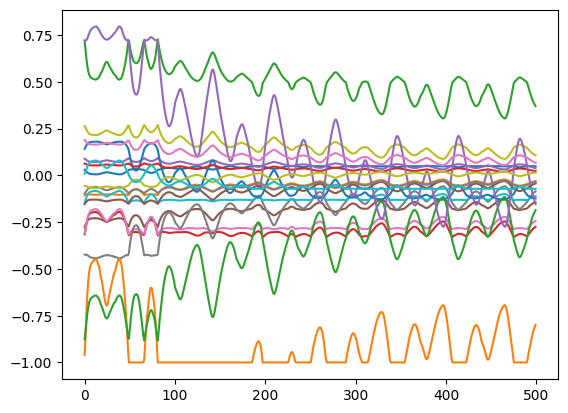

In [179]:
plt.plot(data[:, 0, :])
plt.show()

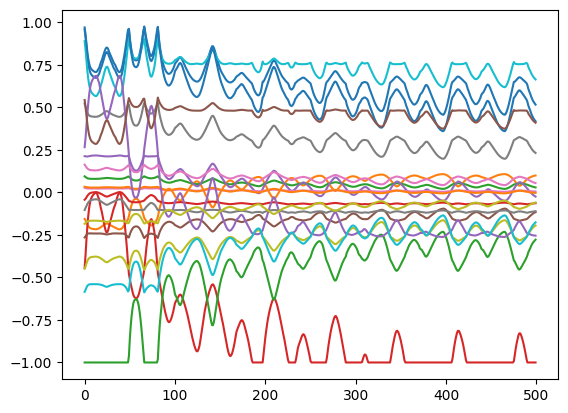

In [180]:
plt.plot(data[:, 1, :])
plt.show()

In [207]:
x, y = w1[:250, 0, 0, :]

ValueError: too many values to unpack (expected 2)

In [166]:
np.array(rewards).shape

(4, 1951)

Neuron:  0
---before---
0.005053509135640006
---after---
0.5844053539276525

Neuron:  1
---before---
0.005061737729128475
---after---
0.4739850589302468



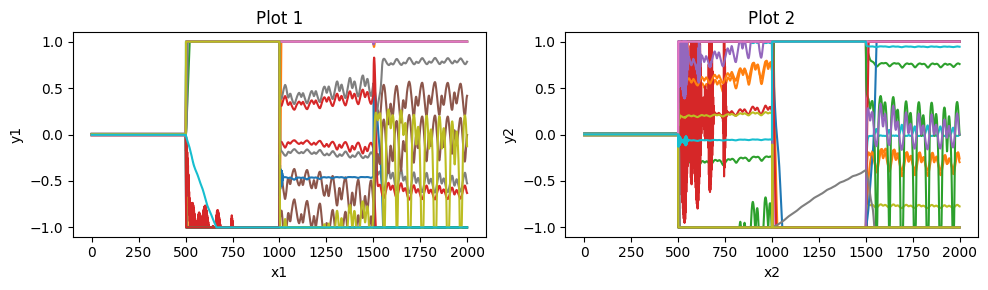

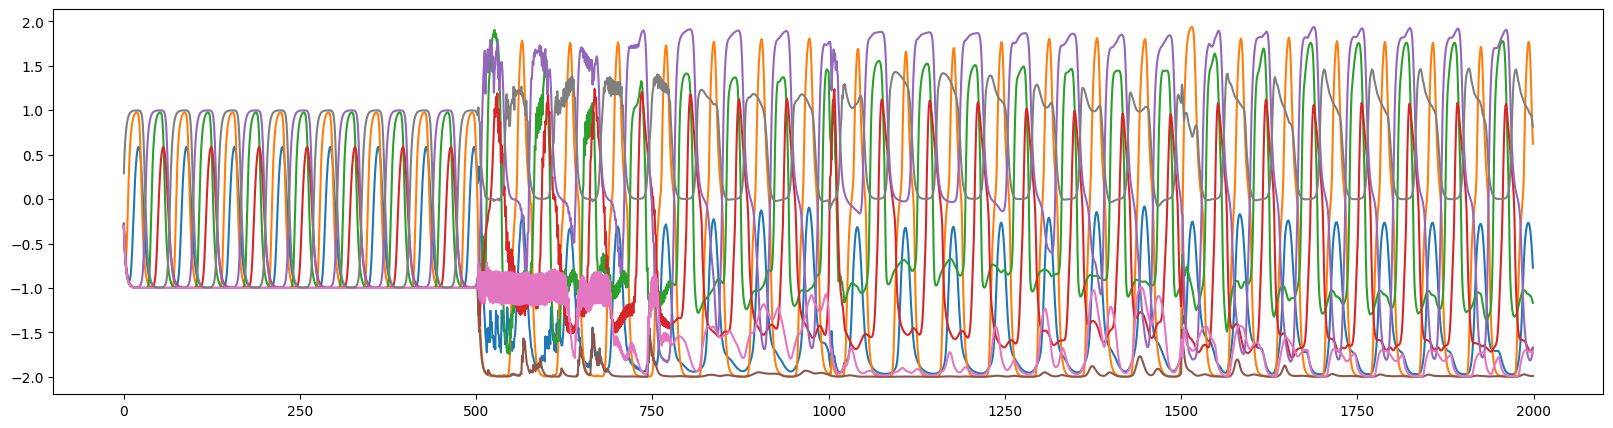

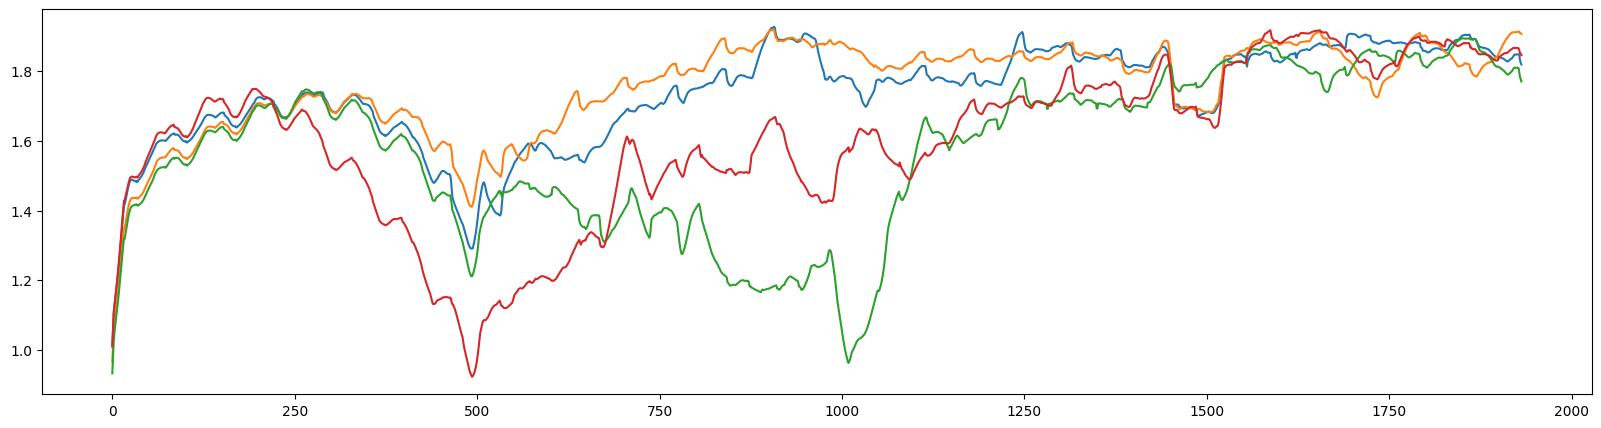

In [277]:
w1 = np.load('w1.npy')
data = w1[:, 0, :]
for i in range(data.shape[1]):
    print('Neuron: ', i)
    print('---before---')
    print(abs(np.mean(data[:250, i, :], axis=0)).mean())
    print('---after---')
    print(abs(np.mean(data[250:, i, :], axis=0)).mean())  
    print()
data1 = w1[:, 0, 0, :]
data2 = w1[:, 0, 1, :]

plot_side_by_side(data1, data2)
act = np.load('action.npy')
plt.figure(figsize=(20,5))
plt.plot(act[:,0,:])
plt.show()
rewards = np.load('rewards.npy')
plt.figure(figsize=(20,5))
filter_step = 69
rewards = [np.convolve(rewards[:, i], np.ones(filter_step), 
            "valid")/filter_step for i in range(4)]
plt.plot(np.swapaxes(rewards, 0, 1))
plt.show()

## Sensory weights Contribution Analysis

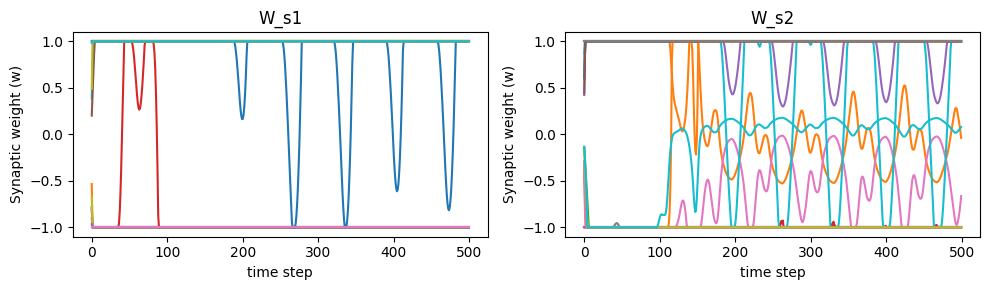

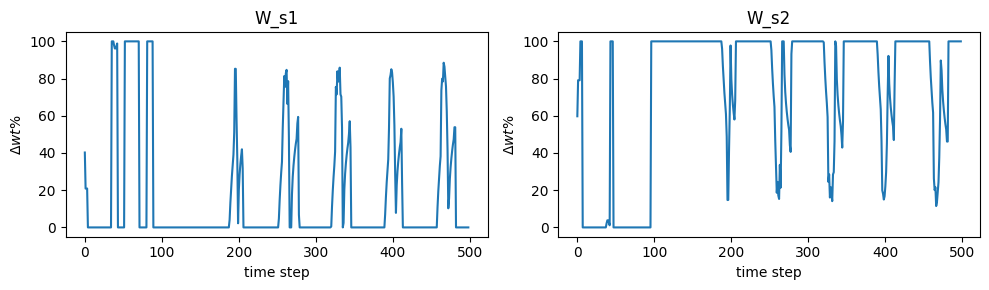

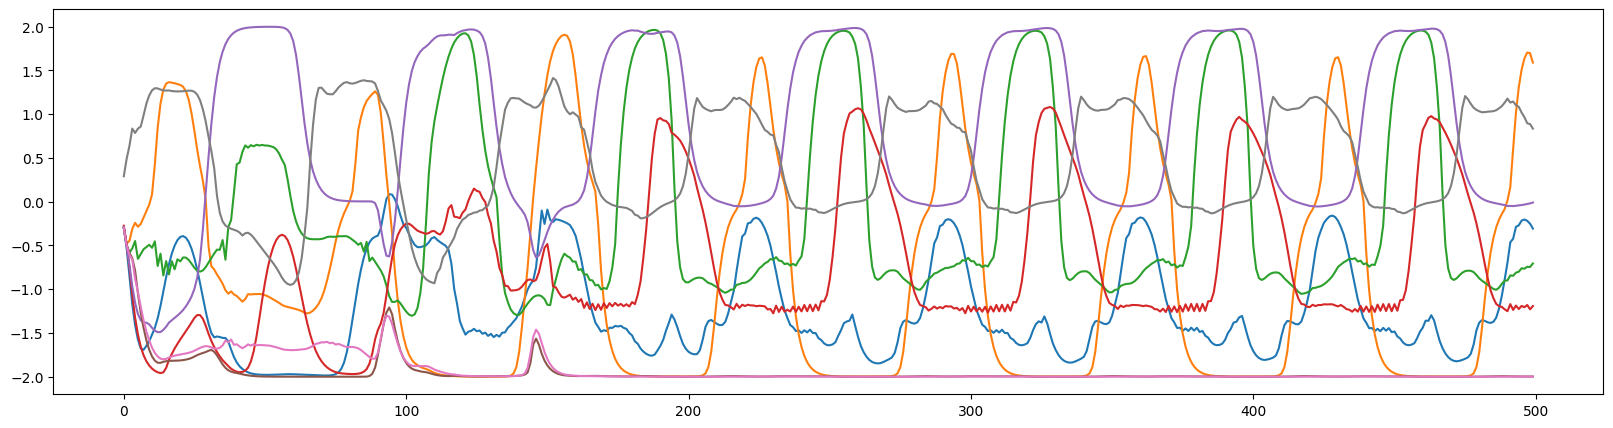

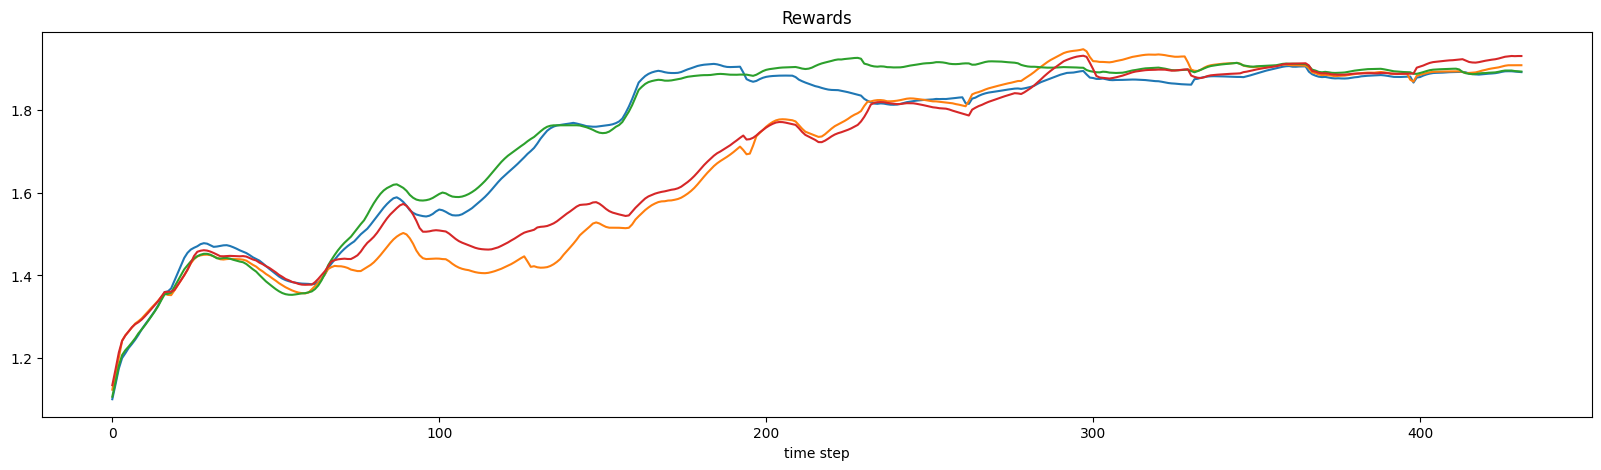

In [73]:
# S0 Loss condition
weights = np.load('w1_s0Loss.npy')
weights = weights[:, 0, :]

data1 = weights[:, 0]
data2 = weights[:, 1]

diff_data1 = np.diff(data1, axis=0)
diff_data2 = np.diff(data2, axis=0)

diff_sum = np.sum(abs(diff_data1) + abs(diff_data2), axis=1)
cont_n1 = np.divide(np.sum(abs(diff_data1), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100
cont_n2 = np.divide(np.sum(abs(diff_data2), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100

plot_side_by_side(data1, data2, ylabel='Synaptic weight (w)')
plot_side_by_side(cont_n1, cont_n2, ylabel='$\Delta wt\%$')
act = np.load('action_s0Loss.npy')
plt.figure(figsize=(20,5))
plt.plot(act[:,0,:])
plt.show()
rewards = np.load('rewards_s0Loss.npy')
plt.figure(figsize=(20,5))
filter_step = 69
rewards = [np.convolve(rewards[:, i], np.ones(filter_step), 
            "valid")/filter_step for i in range(4)]
plt.plot(np.swapaxes(rewards, 0, 1))
plt.title('Rewards')
plt.xlabel('time step')
plt.show()

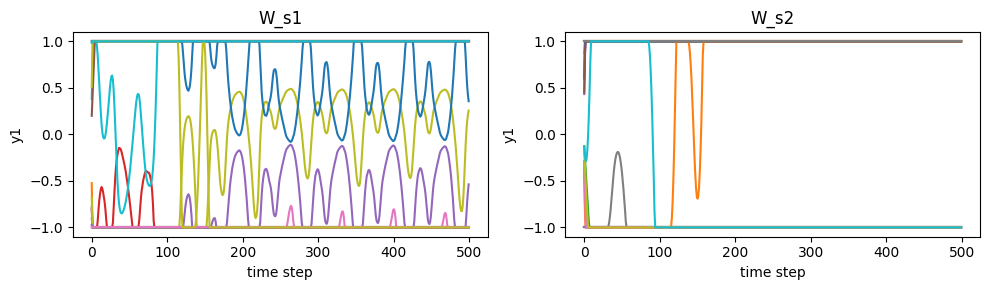

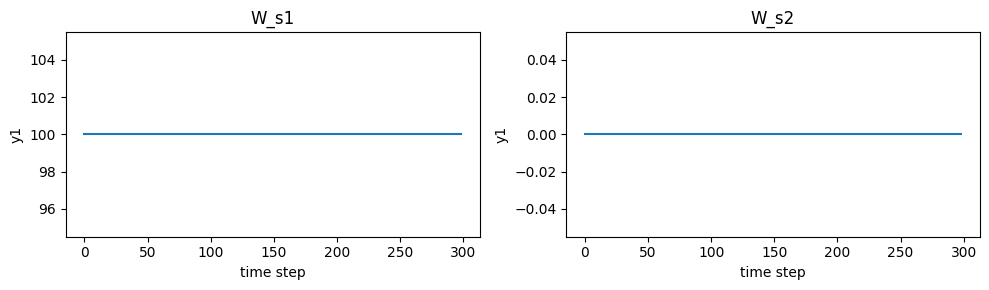

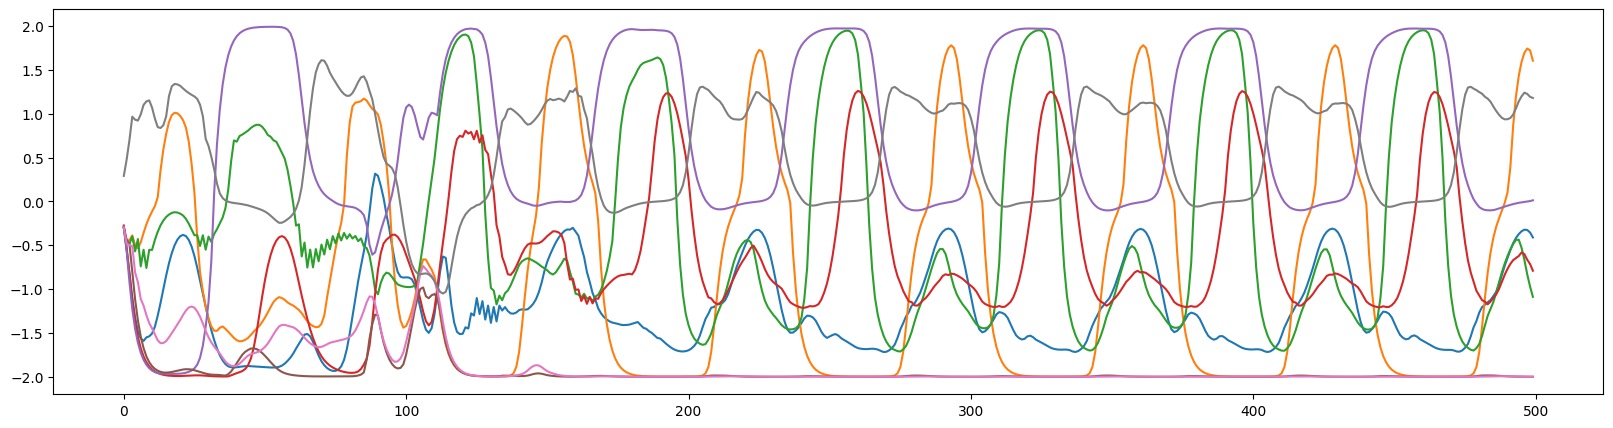

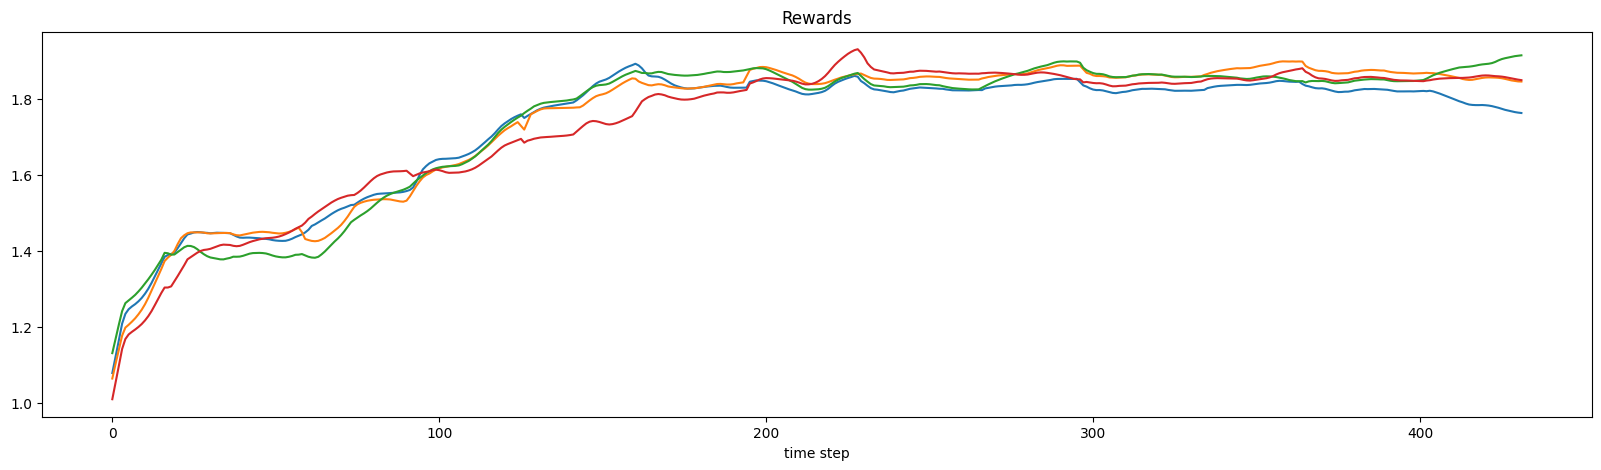

In [80]:
# S0 Loss condition
weights = np.load('w1_s1Loss.npy')
weights = weights[:, 0, :]

data1 = weights[:, 0]
data2 = weights[:, 1]

diff_data1 = np.diff(data1, axis=0)[200:]
diff_data2 = np.diff(data2, axis=0)[200:]

diff_sum = np.sum(abs(diff_data1) + abs(diff_data2), axis=1)
cont_n1 = np.divide(np.sum(abs(diff_data1), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100
cont_n2 = np.divide(np.sum(abs(diff_data2), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100

plot_side_by_side(data1, data2)
plot_side_by_side(cont_n1, cont_n2)
act = np.load('action_s1Loss.npy')
plt.figure(figsize=(20,5))
plt.plot(act[:,0,:])
plt.show()
rewards = np.load('rewards_s1Loss.npy')
plt.figure(figsize=(20,5))
filter_step = 69
rewards = [np.convolve(rewards[:, i], np.ones(filter_step), 
            "valid")/filter_step for i in range(4)]
plt.plot(np.swapaxes(rewards, 0, 1))
plt.title('Rewards')
plt.xlabel('time step')
plt.show()

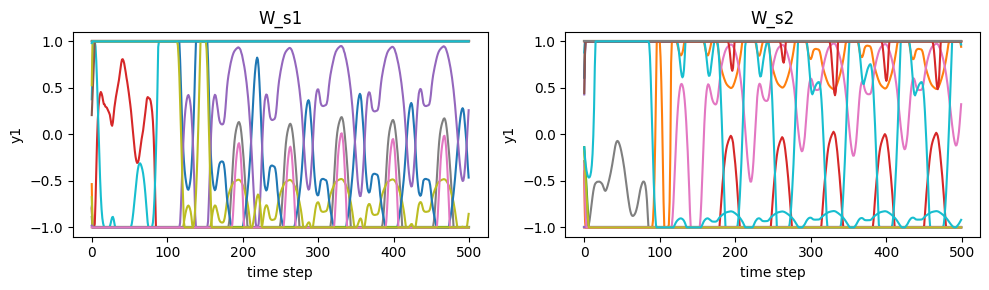

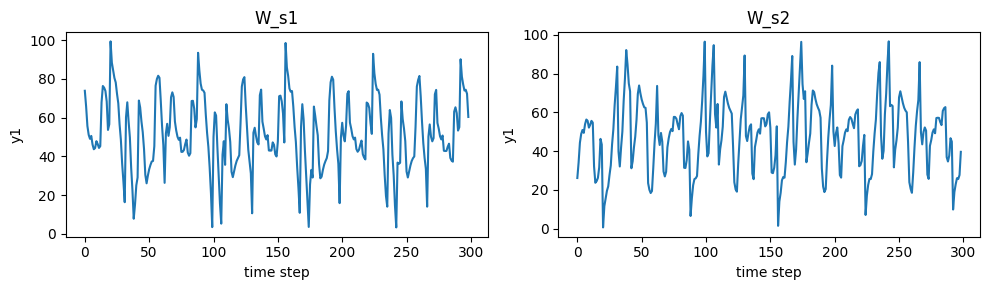

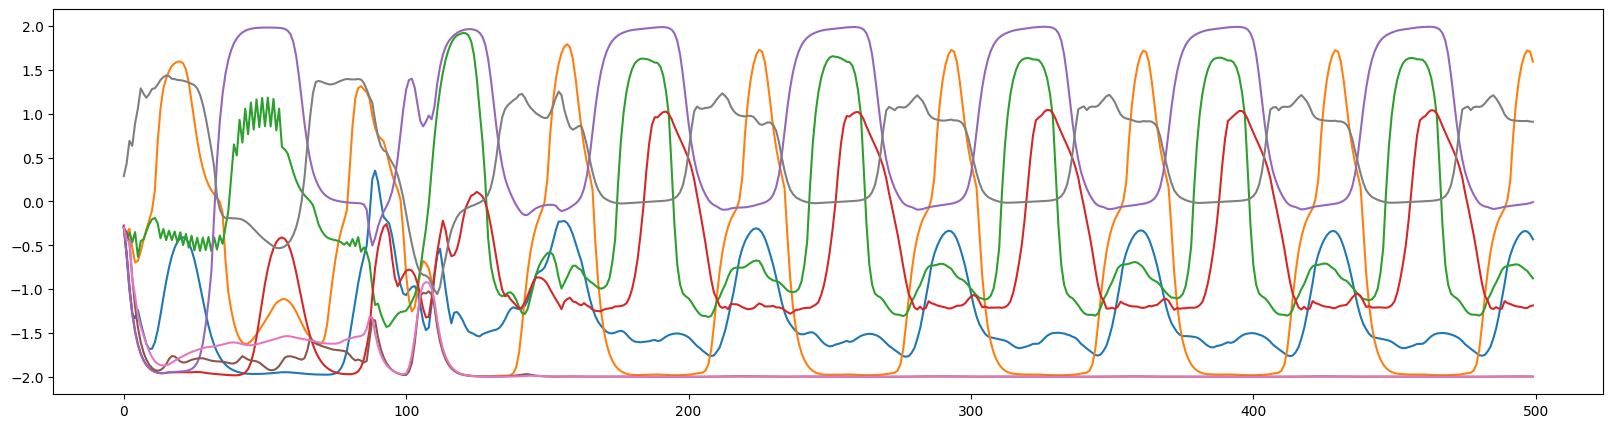

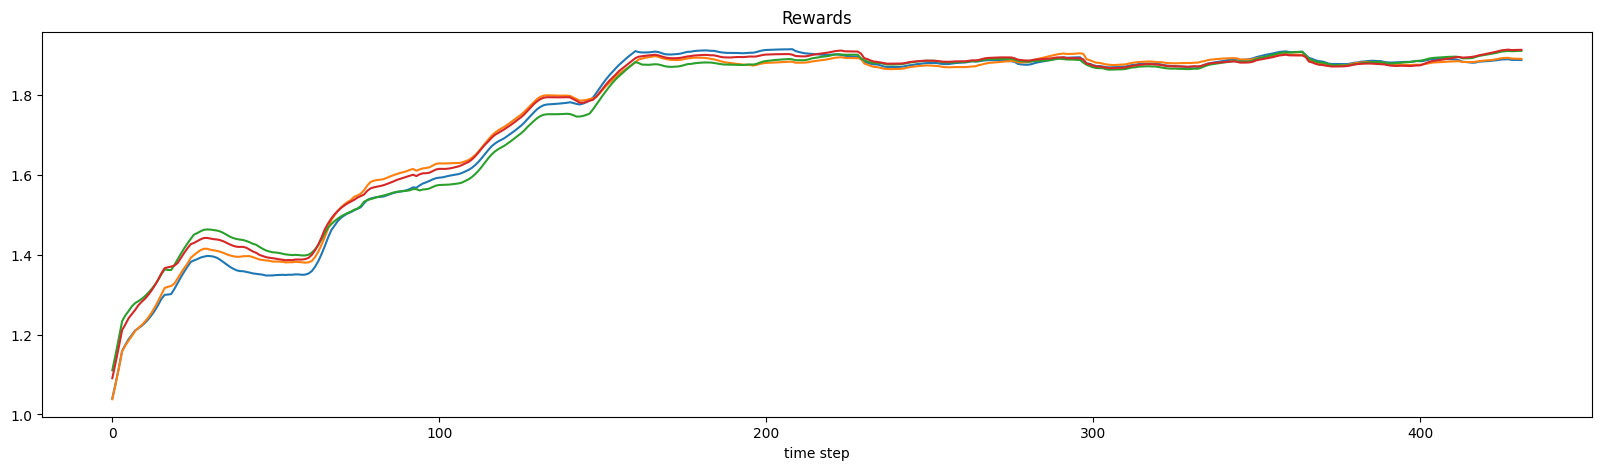

In [82]:
# No Loss condition
weights = np.load('w1_noLoss.npy')
weights = weights[:, 0, :]

data1 = weights[:, 0]
data2 = weights[:, 1]

diff_data1 = np.diff(data1, axis=0)[200:]
diff_data2 = np.diff(data2, axis=0)[200:]

diff_sum = np.sum(abs(diff_data1) + abs(diff_data2), axis=1)
cont_n1 = np.divide(np.sum(abs(diff_data1), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100
cont_n2 = np.divide(np.sum(abs(diff_data2), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100

plot_side_by_side(data1, data2)
plot_side_by_side(cont_n1, cont_n2)
act = np.load('action_noLoss.npy')
plt.figure(figsize=(20,5))
plt.plot(act[:,0,:])
plt.show()
rewards = np.load('rewards_noLoss.npy')
plt.figure(figsize=(20,5))
filter_step = 69
rewards = [np.convolve(rewards[:, i], np.ones(filter_step), 
            "valid")/filter_step for i in range(4)]
plt.plot(np.swapaxes(rewards, 0, 1))
plt.title('Rewards')
plt.xlabel('time step')
plt.show()

## Sensory weights Contribution Analysis
### input Yaw angle + Foot contact sensor

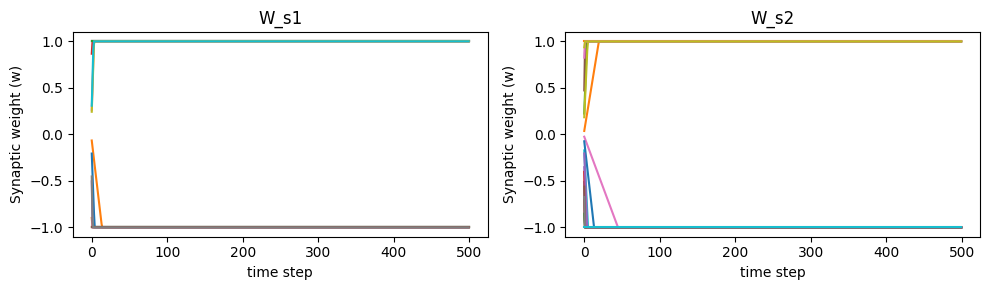

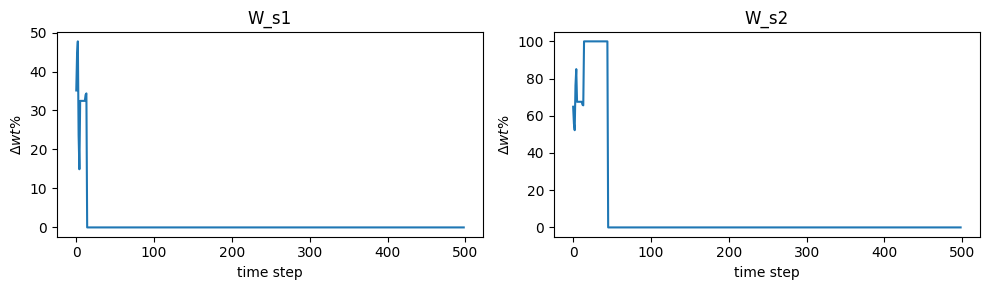

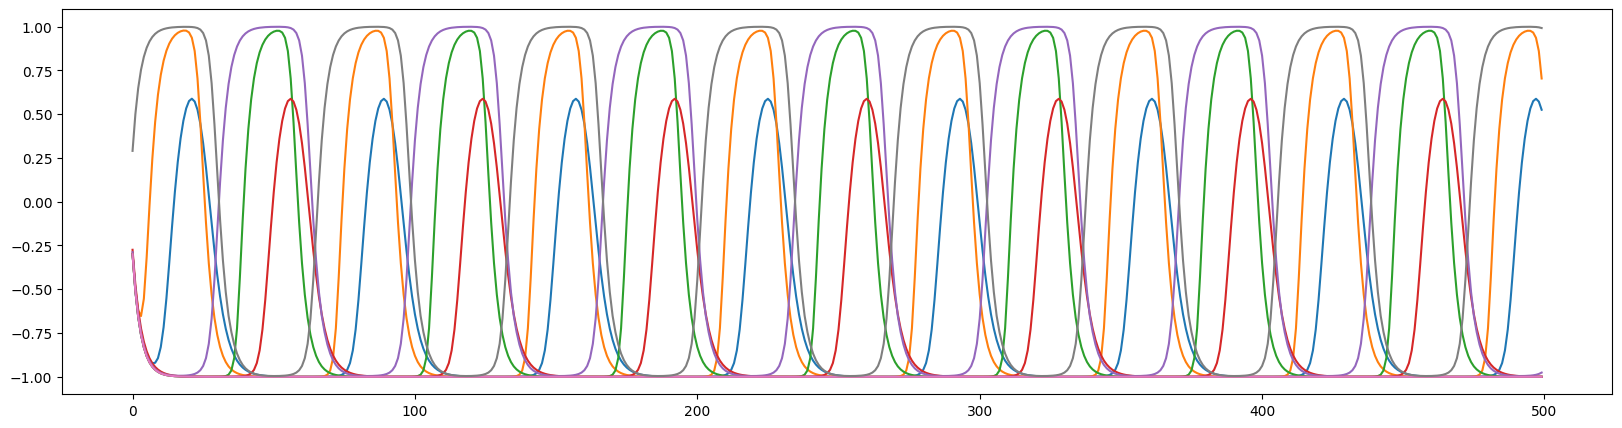

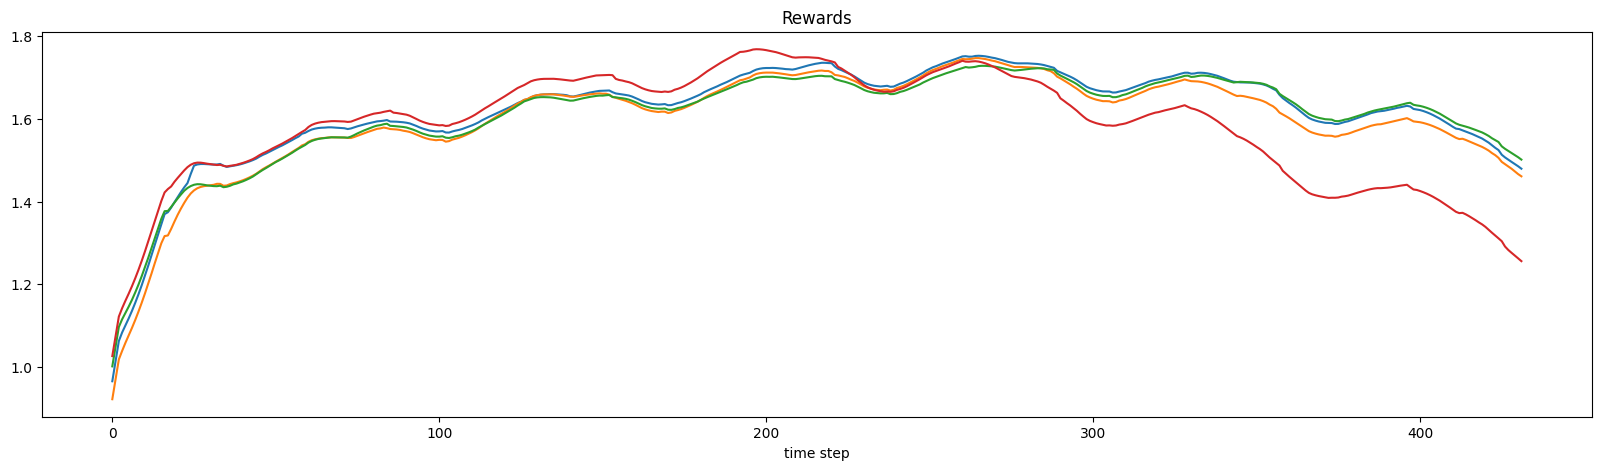

In [83]:
# S0 Loss condition
weights = np.load('w1.npy')
weights = weights[:, 0, :]

data1 = weights[:, 0]
data2 = weights[:, 1]

diff_data1 = np.diff(data1, axis=0)
diff_data2 = np.diff(data2, axis=0)

diff_sum = np.sum(abs(diff_data1) + abs(diff_data2), axis=1)
cont_n1 = np.divide(np.sum(abs(diff_data1), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100
cont_n2 = np.divide(np.sum(abs(diff_data2), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100

plot_side_by_side(data1, data2, ylabel='Synaptic weight (w)')
plot_side_by_side(cont_n1, cont_n2, ylabel='$\Delta wt\%$')
act = np.load('action.npy')
plt.figure(figsize=(20,5))
plt.plot(act[:,0,:])
plt.show()
rewards = np.load('rewards.npy')
plt.figure(figsize=(20,5))
filter_step = 69
rewards = [np.convolve(rewards[:, i], np.ones(filter_step), 
            "valid")/filter_step for i in range(4)]
plt.plot(np.swapaxes(rewards, 0, 1))
plt.title('Rewards')
plt.xlabel('time step')
plt.show()

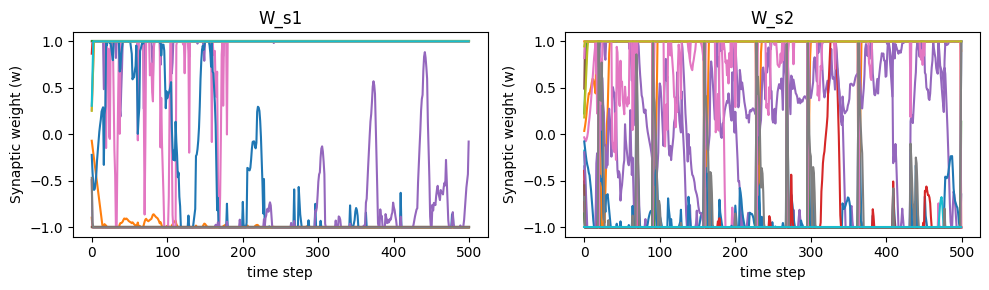

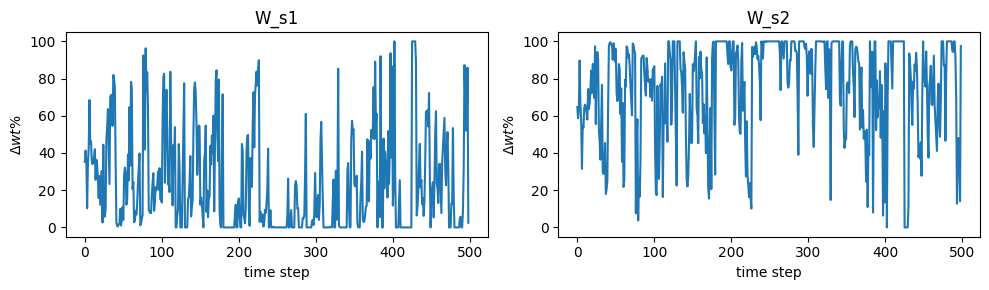

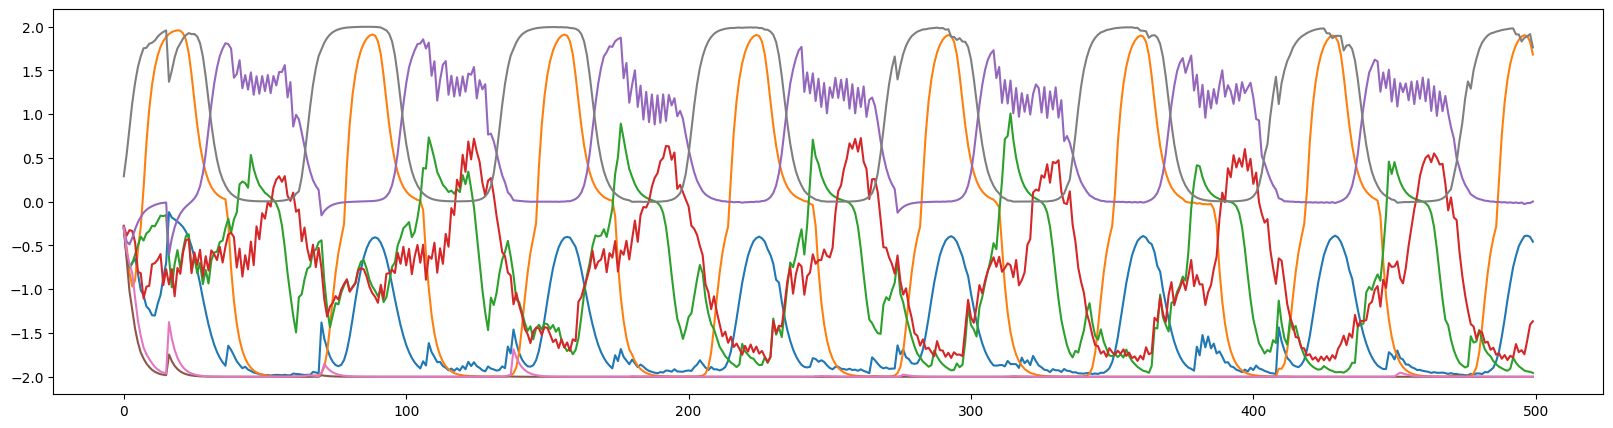

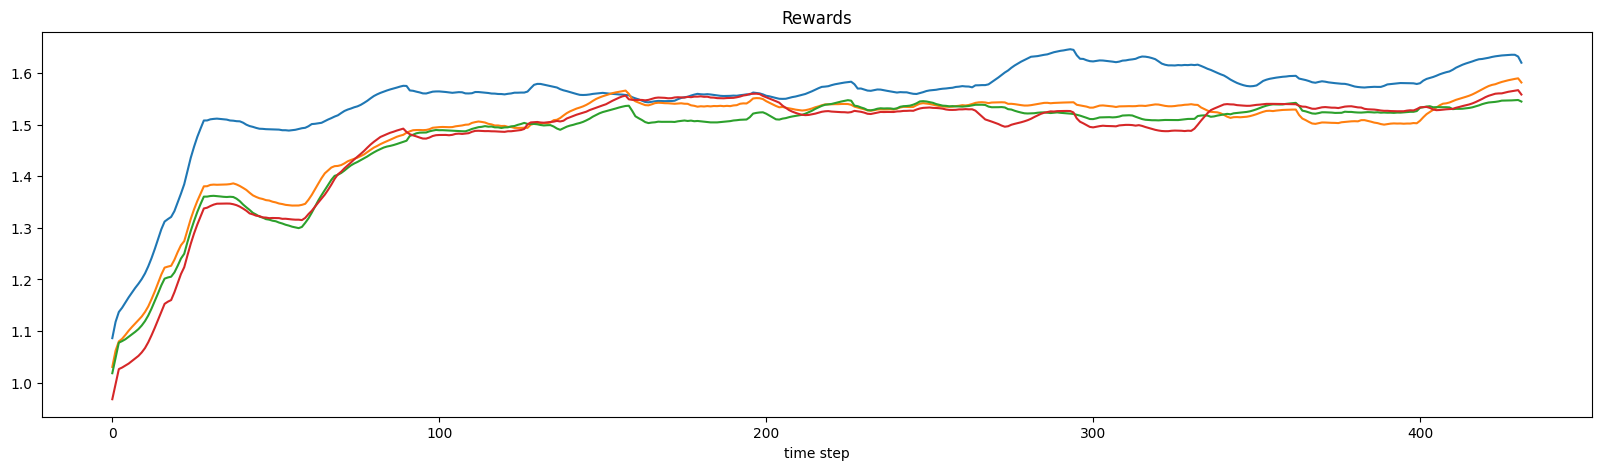

In [84]:
# No Loss condition
weights = np.load('w1_noLoss_imu+FC.npy')
weights = weights[:, 0, :]

data1 = weights[:, 0]
data2 = weights[:, 1]

diff_data1 = np.diff(data1, axis=0)
diff_data2 = np.diff(data2, axis=0)

diff_sum = np.sum(abs(diff_data1) + abs(diff_data2), axis=1)
cont_n1 = np.divide(np.sum(abs(diff_data1), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100
cont_n2 = np.divide(np.sum(abs(diff_data2), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100

plot_side_by_side(data1, data2, ylabel='Synaptic weight (w)')
plot_side_by_side(cont_n1, cont_n2, ylabel='$\Delta wt\%$')
act = np.load('action_noLoss_imu+FC.npy')
plt.figure(figsize=(20,5))
plt.plot(act[:,0,:])
plt.show()
rewards = np.load('rewards_noLoss_imu+FC.npy')
plt.figure(figsize=(20,5))
filter_step = 69
rewards = [np.convolve(rewards[:, i], np.ones(filter_step), 
            "valid")/filter_step for i in range(4)]
plt.plot(np.swapaxes(rewards, 0, 1))
plt.title('Rewards')
plt.xlabel('time step')
plt.show()

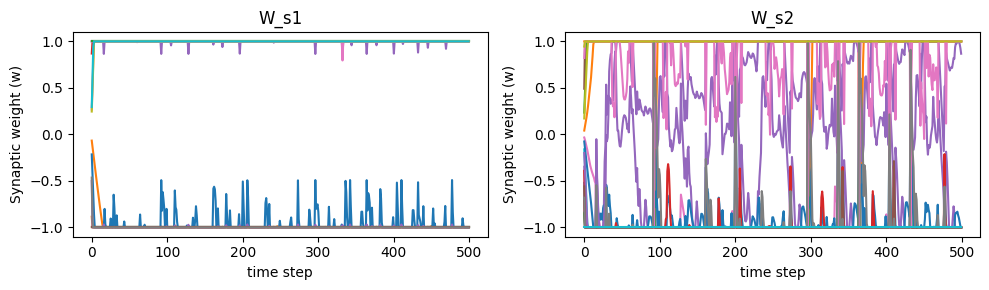

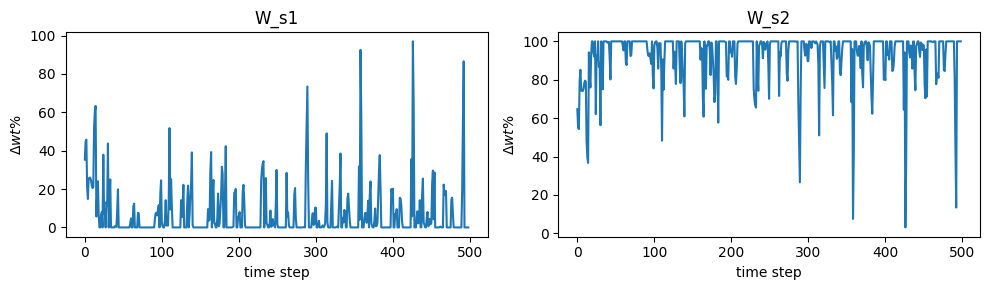

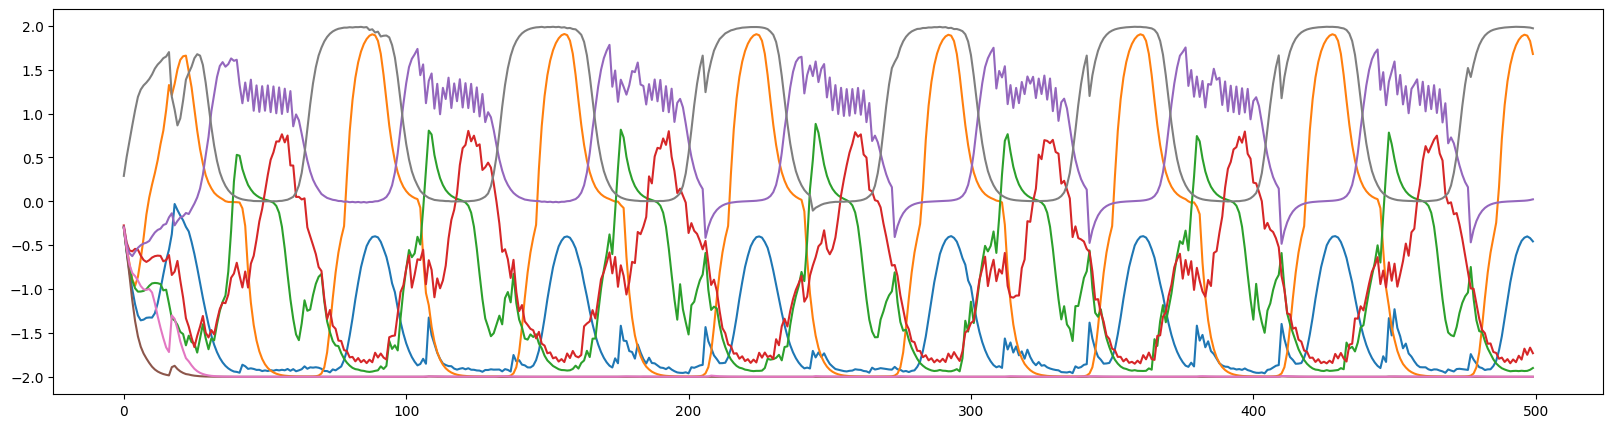

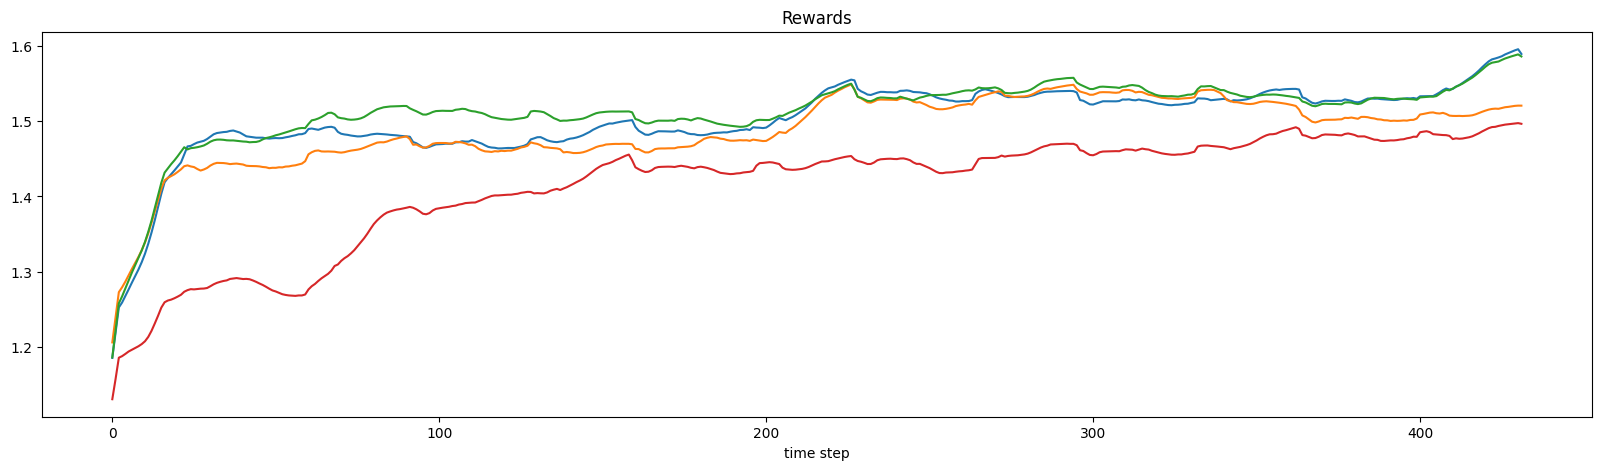

In [85]:
# No Loss condition
weights = np.load('w1_noYaw_imu+FC.npy')
weights = weights[:, 0, :]

data1 = weights[:, 0]
data2 = weights[:, 1]

diff_data1 = np.diff(data1, axis=0)
diff_data2 = np.diff(data2, axis=0)

diff_sum = np.sum(abs(diff_data1) + abs(diff_data2), axis=1)
cont_n1 = np.divide(np.sum(abs(diff_data1), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100
cont_n2 = np.divide(np.sum(abs(diff_data2), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100

plot_side_by_side(data1, data2, ylabel='Synaptic weight (w)')
plot_side_by_side(cont_n1, cont_n2, ylabel='$\Delta wt\%$')
act = np.load('action_noYaw_imu+FC.npy')
plt.figure(figsize=(20,5))
plt.plot(act[:,0,:])
plt.show()
rewards = np.load('rewards_noYaw_imu+FC.npy')
plt.figure(figsize=(20,5))
filter_step = 69
rewards = [np.convolve(rewards[:, i], np.ones(filter_step), 
            "valid")/filter_step for i in range(4)]
plt.plot(np.swapaxes(rewards, 0, 1))
plt.title('Rewards')
plt.xlabel('time step')
plt.show()

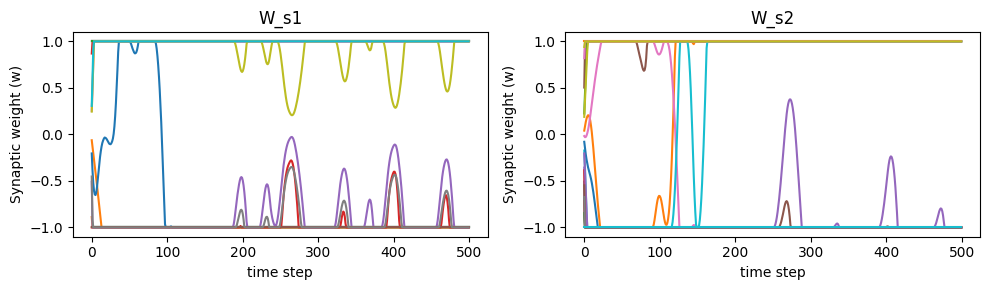

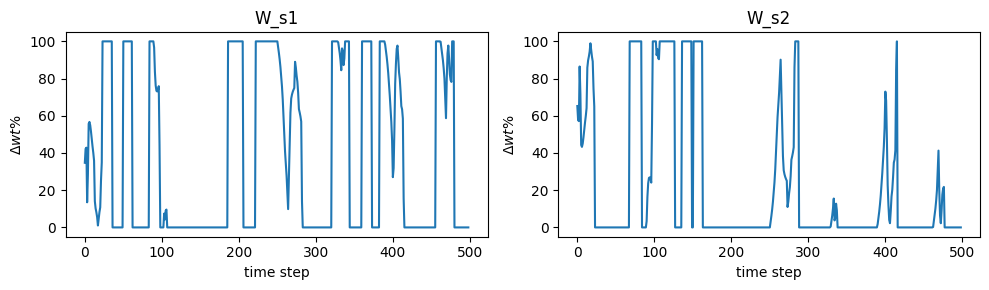

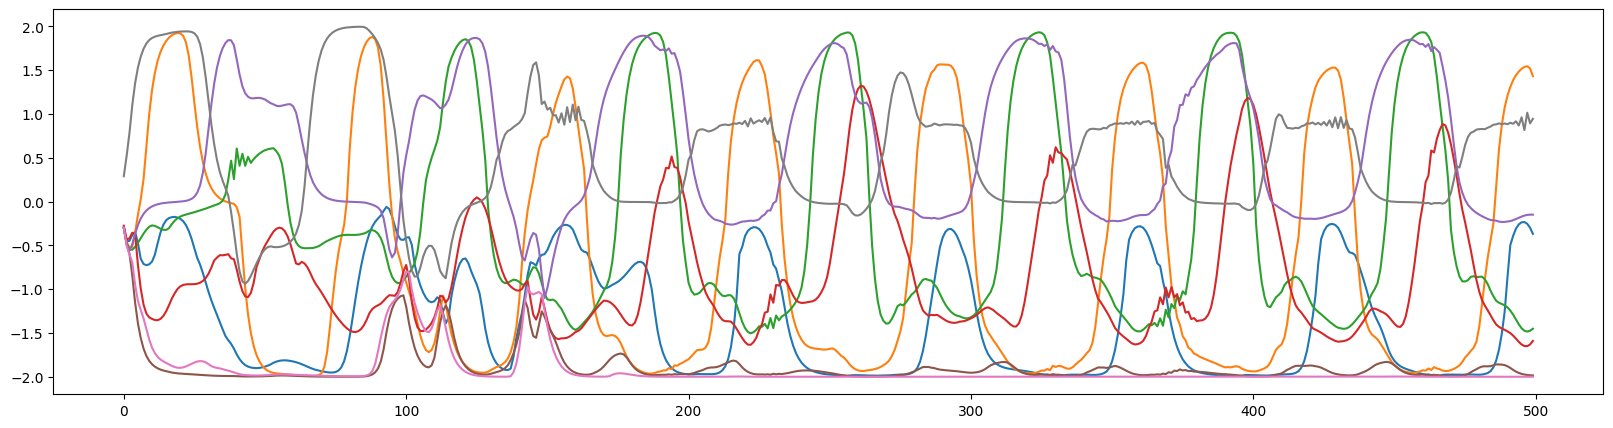

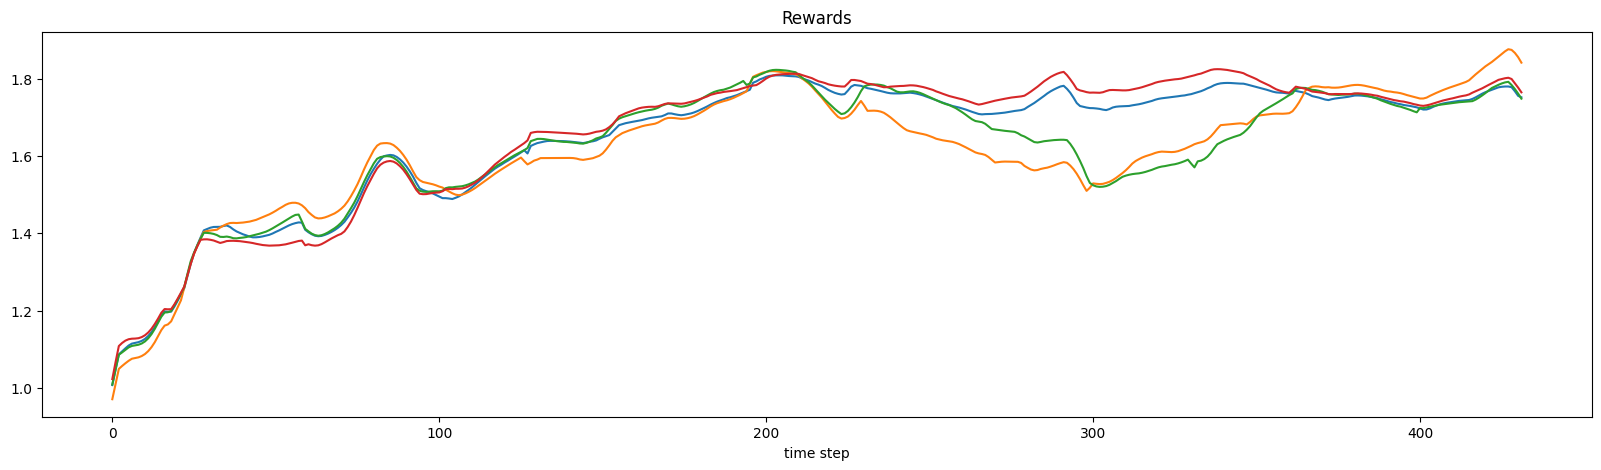

In [86]:
# No Loss condition
weights = np.load('w1_noFC_imu+FC.npy')
weights = weights[:, 0, :]

data1 = weights[:, 0]
data2 = weights[:, 1]

diff_data1 = np.diff(data1, axis=0)
diff_data2 = np.diff(data2, axis=0)

diff_sum = np.sum(abs(diff_data1) + abs(diff_data2), axis=1)
cont_n1 = np.divide(np.sum(abs(diff_data1), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100
cont_n2 = np.divide(np.sum(abs(diff_data2), axis=1), diff_sum, out=np.zeros_like(diff_sum), where=diff_sum!=0)*100

plot_side_by_side(data1, data2, ylabel='Synaptic weight (w)')
plot_side_by_side(cont_n1, cont_n2, ylabel='$\Delta wt\%$')
act = np.load('action_noFC_imu+FC.npy')
plt.figure(figsize=(20,5))
plt.plot(act[:,0,:])
plt.show()
rewards = np.load('rewards_noFC_imu+FC.npy')
plt.figure(figsize=(20,5))
filter_step = 69
rewards = [np.convolve(rewards[:, i], np.ones(filter_step), 
            "valid")/filter_step for i in range(4)]
plt.plot(np.swapaxes(rewards, 0, 1))
plt.title('Rewards')
plt.xlabel('time step')
plt.show()

Neuron:  0
---before---
0.21697901668429517
---after---
0.16558388013944994

Neuron:  1
---before---
0.2931230840916069
---after---
0.2649986943131601



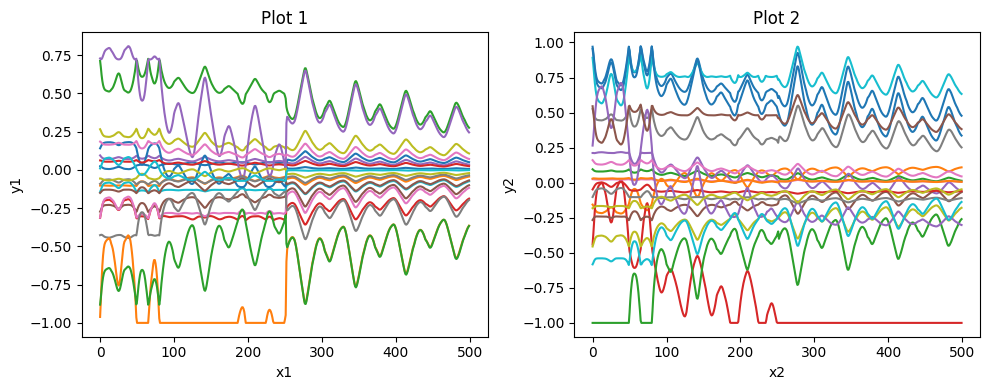

In [223]:
w1_c1 = np.load('w1_c1.npy')
data = w1_c1[:, 0, :]
for i in range(data.shape[1]):
    print('Neuron: ', i)
    print('---before---')
    print(abs(np.mean(data[:250, i, :], axis=0)).mean())
    print('---after---')
    print(abs(np.mean(data[250:, i, :], axis=0)).mean())  
    print()  
data1 = w1_c1[:, 0, 0, :]
data2 = w1_c1[:, 0, 1, :]

plot_side_by_side(data1, data2)


Neuron:  0
---before---
0.21778322755904095
---after---
0.17486507740040017

Neuron:  1
---before---
0.2945794900417659
---after---
0.21600099106701873



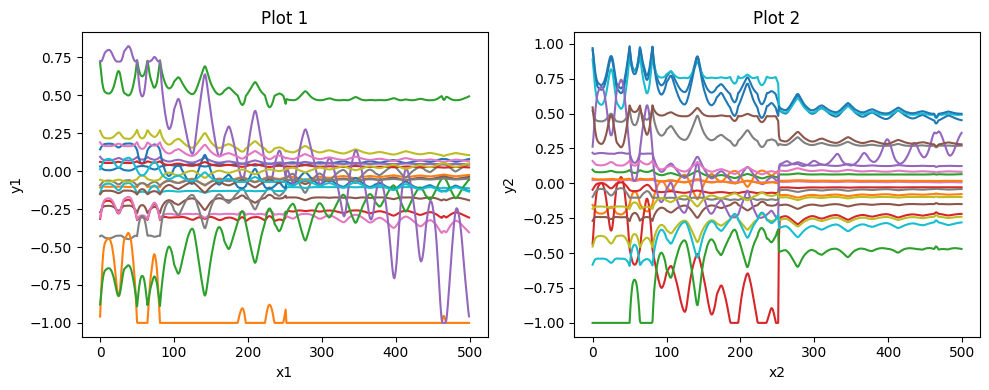

In [224]:
w1_c2 = np.load('w1_c2.npy')
data = w1_c2[:, 0, :]
for i in range(data.shape[1]):
    print('Neuron: ', i)
    print('---before---')
    print(abs(np.mean(data[:250, i, :], axis=0)).mean())
    print('---after---')
    print(abs(np.mean(data[250:, i, :], axis=0)).mean())  
    print()  
data1 = w1_c2[:, 0, 0, :]
data2 = w1_c2[:, 0, 1, :]

plot_side_by_side(data1, data2)

Neuron:  0
---before---
0.2154645096806041
---after---
0.2963280480370861

Neuron:  1
---before---
0.29216938493853367
---after---
0.39462543357346486



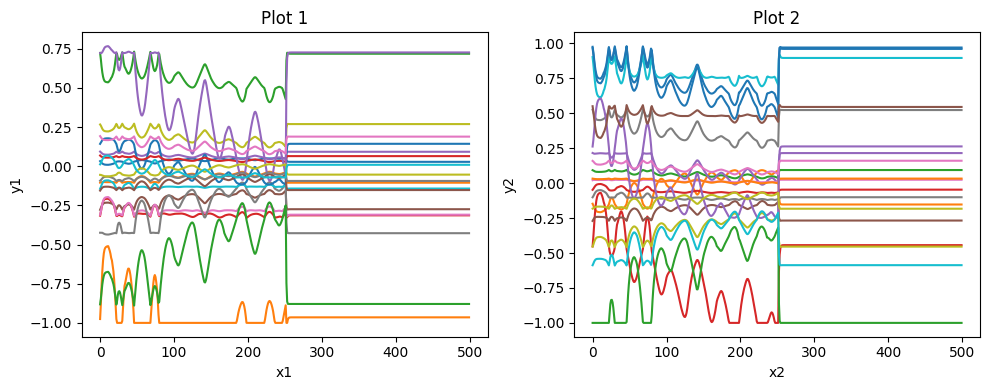

In [225]:
w1_c3 = np.load('w1_c3.npy')
data = w1_c3[:, 0, :]
for i in range(data.shape[1]):
    print('Neuron: ', i)
    print('---before---')
    print(abs(np.mean(data[:250, i, :], axis=0)).mean())
    print('---after---')
    print(abs(np.mean(data[250:, i, :], axis=0)).mean())  
    print()  
data1 = w1_c3[:, 0, 0, :]
data2 = w1_c3[:, 0, 1, :]

plot_side_by_side(data1, data2)

Neuron:  0
---before---
0.21209691777311682
---after---
0.19838187686232708

Neuron:  1
---before---
0.2893317966890066
---after---
0.2797713280311155



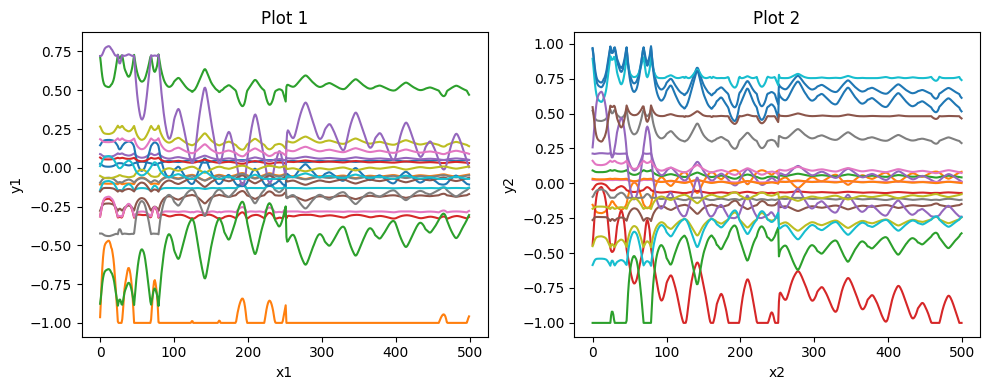

In [226]:
w1_c4 = np.load('w1_c4.npy')
data = w1_c4[:, 0, :]
for i in range(data.shape[1]):
    print('Neuron: ', i)
    print('---before---')
    print(abs(np.mean(data[:250, i, :], axis=0)).mean())
    print('---after---')
    print(abs(np.mean(data[250:, i, :], axis=0)).mean())  
    print()  
data1 = w1_c4[:, 0, 0, :]
data2 = w1_c4[:, 0, 1, :]

plot_side_by_side(data1, data2)

Neuron:  0
---before---
0.248887019866287
---after---
0.17434907214189505

Neuron:  1
---before---
0.3271985129693409
---after---
0.2652039294357076



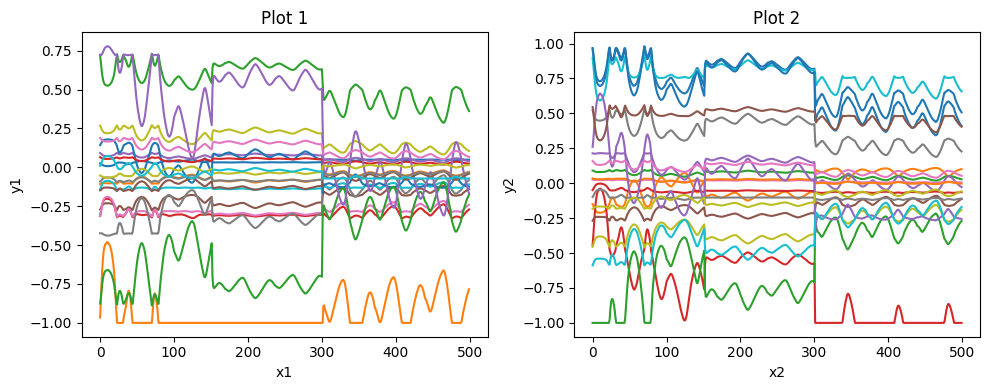

In [229]:
w1_c5 = np.load('w1_c5.npy')
data = w1_c5[:, 0, :]
for i in range(data.shape[1]):
    print('Neuron: ', i)
    print('---before---')
    print(abs(np.mean(data[:250, i, :], axis=0)).mean())
    print('---after---')
    print(abs(np.mean(data[250:, i, :], axis=0)).mean())  
    print()  
data1 = w1_c5[:, 0, 0, :]
data2 = w1_c5[:, 0, 1, :]

plot_side_by_side(data1, data2)

Neuron:  0
---before---
0.26150301699499257
---after---
0.16969163564786174

Neuron:  1
---before---
0.349827784666784
---after---
0.2638576929442186



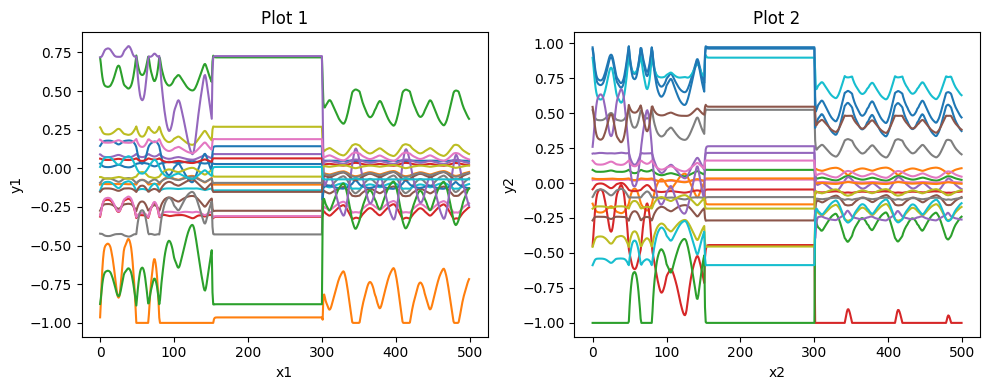

In [232]:
w1_c5 = np.load('w1_c5.npy')
data = w1_c5[:, 0, :]
for i in range(data.shape[1]):
    print('Neuron: ', i)
    print('---before---')
    print(abs(np.mean(data[:250, i, :], axis=0)).mean())
    print('---after---')
    print(abs(np.mean(data[250:, i, :], axis=0)).mean())  
    print()  
data1 = w1_c5[:, 0, 0, :]
data2 = w1_c5[:, 0, 1, :]

plot_side_by_side(data1, data2)

Neuron:  0
---before---
0.2812201329058318
---after---
0.15215520327962118

Neuron:  1
---before---
0.36890753450051283
---after---
0.2450888257126525



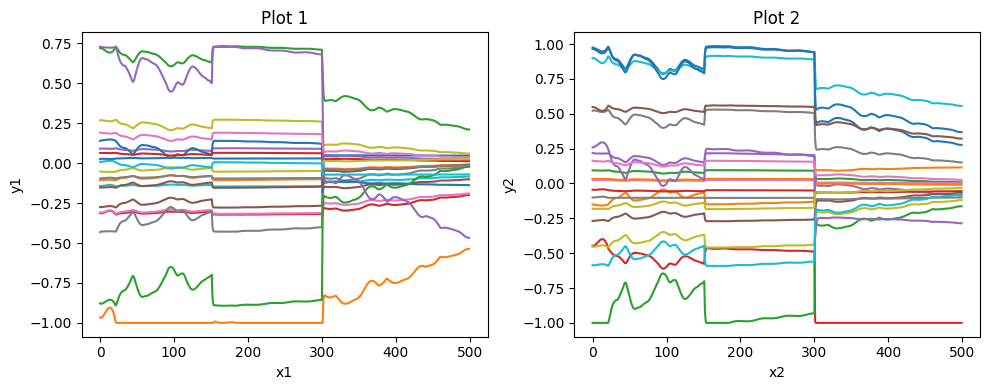

In [5]:
w1_c6 = np.load('w1_c6.npy')
data = w1_c6[:, 0, :]
for i in range(data.shape[1]):
    print('Neuron: ', i)
    print('---before---')
    print(abs(np.mean(data[:250, i, :], axis=0)).mean())
    print('---after---')
    print(abs(np.mean(data[250:, i, :], axis=0)).mean())  
    print()  
data1 = w1_c6[:, 0, 0, :]
data2 = w1_c6[:, 0, 1, :]

plot_side_by_side(data1, data2)

Neuron:  0
---before---
69.69599309384041
---after---
223.37625680248703

Neuron:  1
---before---
187.41827542492555
---after---
559.1185824688939



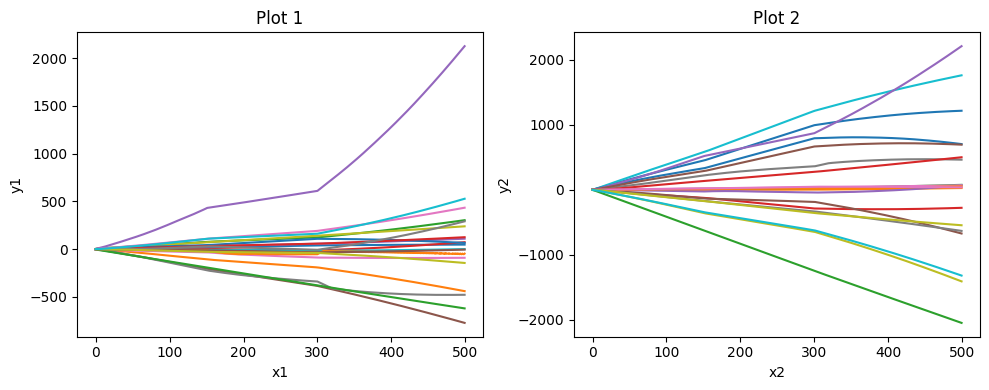

In [6]:
w1_c7 = np.load('w1_c7.npy')
data = w1_c7[:, 0, :]
for i in range(data.shape[1]):
    print('Neuron: ', i)
    print('---before---')
    print(abs(np.mean(data[:250, i, :], axis=0)).mean())
    print('---after---')
    print(abs(np.mean(data[250:, i, :], axis=0)).mean())  
    print()  
data1 = w1_c7[:, 0, 0, :]
data2 = w1_c7[:, 0, 1, :]

plot_side_by_side(data1, data2)

Neuron:  0
---before---
0.9711372552133332
---after---
0.9712166166110977

Neuron:  1
---before---
0.9430690069187386
---after---
0.976056965033591



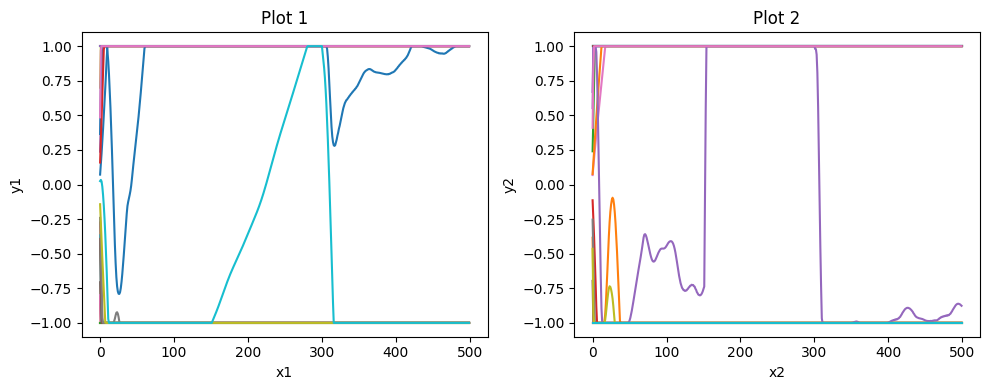

In [9]:
w1_c8 = np.load('w1_c8.npy')
data = w1_c8[:, 0, :]
for i in range(data.shape[1]):
    print('Neuron: ', i)
    print('---before---')
    print(abs(np.mean(data[:250, i, :], axis=0)).mean())
    print('---after---')
    print(abs(np.mean(data[250:, i, :], axis=0)).mean())  
    print()  
data1 = w1_c8[:, 0, 0, :]
data2 = w1_c8[:, 0, 1, :]

plot_side_by_side(data1, data2)

In [17]:
act.shape

(500, 4, 8)

Neuron:  0
---before---
0.2621729208983715
---after---
0.17262436318469312

Neuron:  1
---before---
0.34794829926092175
---after---
0.26601758646954343



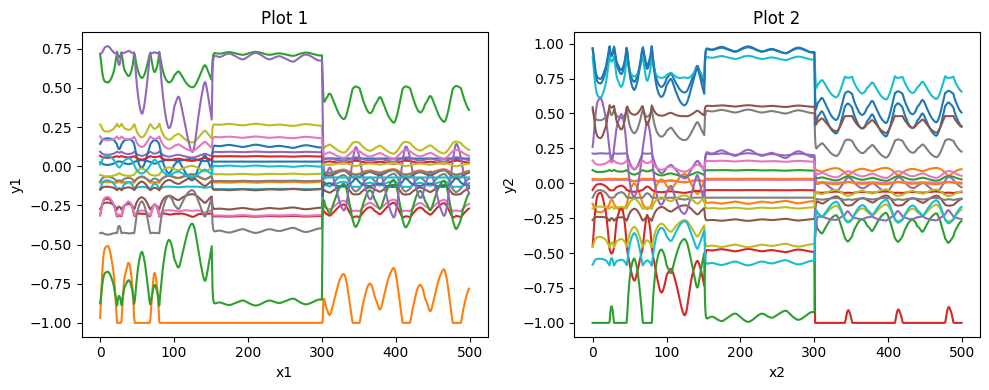

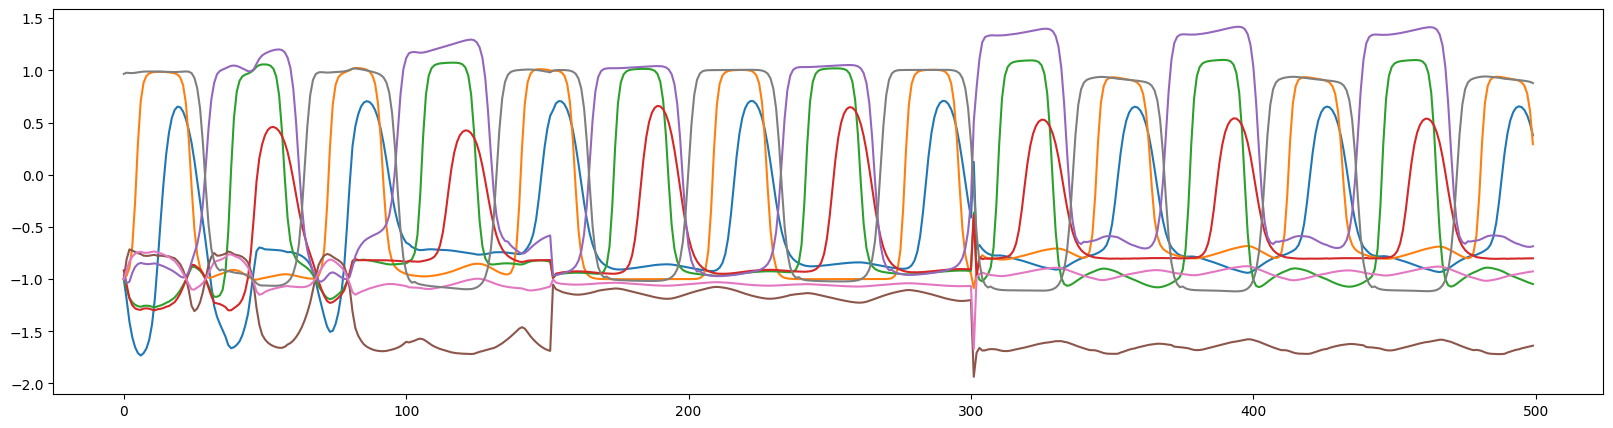

In [23]:
w1_c9 = np.load('w1_c9.npy')
act = np.load('action_c9.npy')
data = w1_c9[:, 0, :]
for i in range(data.shape[1]):
    print('Neuron: ', i)
    print('---before---')
    print(abs(np.mean(data[:250, i, :], axis=0)).mean())
    print('---after---')
    print(abs(np.mean(data[250:, i, :], axis=0)).mean())  
    print()  
data1 = w1_c9[:, 0, 0, :]
data2 = w1_c9[:, 0, 1, :]

plot_side_by_side(data1, data2)
plt.figure(figsize=(20,5))
plt.plot(act[:,0,:])
plt.show()

(array([2., 0., 0., 3., 3., 5., 4., 1., 0., 2.]),
 array([-0.96465132, -0.79559915, -0.62654699, -0.45749482, -0.28844266,
        -0.11939049,  0.04966167,  0.21871384,  0.387766  ,  0.55681817,
         0.72587033]),
 <BarContainer object of 10 artists>)

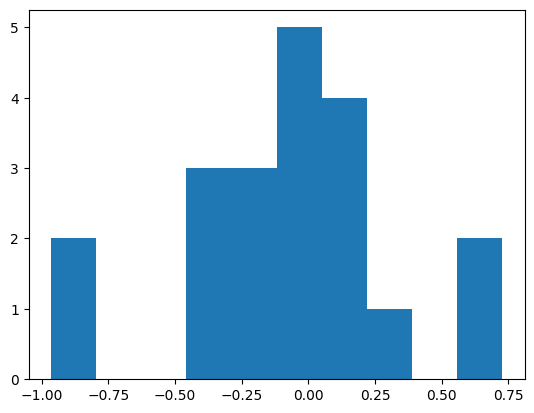

In [86]:
# Calculate contribution index 
# (absolute value of population weight of each sensory neuron)
w_contrib_array = np.mean(data[:, 0, :], axis=0)
w_contrib_array
plt.hist(w_contrib_array)

(array([1., 1., 2., 2., 3., 4., 2., 2., 0., 3.]),
 array([-0.62745332, -0.49955955, -0.37166577, -0.243772  , -0.11587823,
         0.01201555,  0.13990932,  0.2678031 ,  0.39569687,  0.52359065,
         0.65148442]),
 <BarContainer object of 10 artists>)

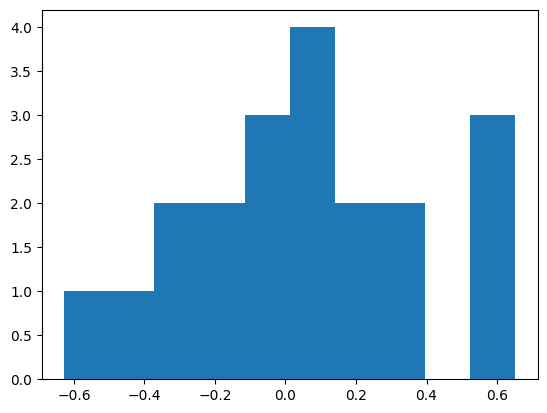

In [83]:
w_contrib_array = np.mean(data[:, 1, :], axis=0)
w_contrib_array
plt.hist(w_contrib_array)

In [64]:
i = np.mean(data[100:200, :], axis=0)
e = np.mean(data[400:, :], axis=0)
diff = e-i

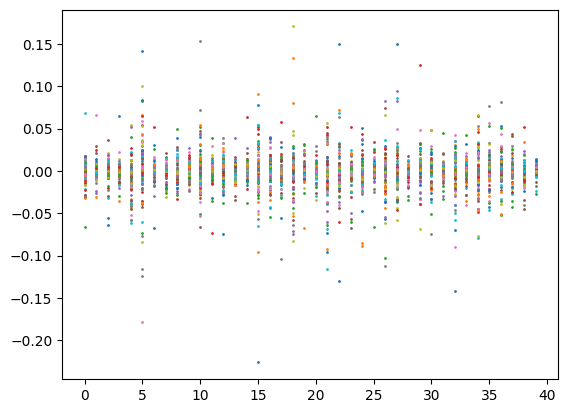

In [75]:
for i in range(0, 3200, 40):
    plt.scatter(range(40), diff[i:i+40], s=1)

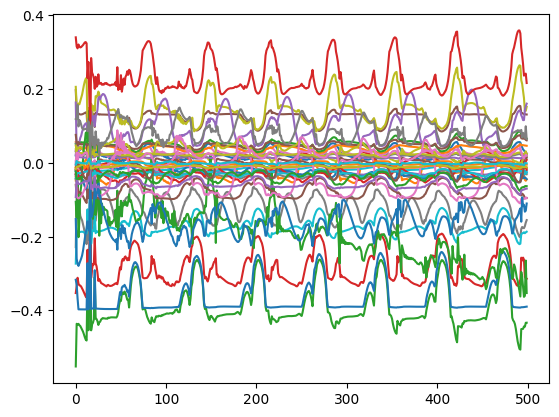

In [54]:
plt.plot(data[:,10, :])
plt.show()

In [1]:
import torch

In [110]:
def get_masked_sens_loss(ind_v):
    arr = []
    for i in ind_v:
        if i == 1:
            arr.append([1,0])
        elif i == 2:
            arr.append([0,1])
        else:
            arr.append([1,1])
    return np.array(arr).reshape(len(ind_v), -1)

In [111]:
v = torch.randint(0, 3, (4,))
print(v)
M = torch.arange(1, 9).reshape(4, 2)
print(M)
mask_arr = get_masked_sens_loss(v)
mask_arr

tensor([2, 0, 1, 2])
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


array([[0, 1],
       [1, 1],
       [1, 0],
       [0, 1]])

In [112]:
v = v.unsqueeze(1)
print(v)
M * mask_arr

tensor([[2],
        [0],
        [1],
        [2]])


tensor([[0, 2],
        [3, 4],
        [5, 0],
        [0, 8]])